# Modules

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Variables

In [2]:
stations_FilePath='/Users/nicolaesse/Documents/Data science/Py/Analisi biciclette Madrid/Stations analysis/Bicimad_Estacions_201809.json'

# Exploratory data analysis

In [3]:
geoJsonFile = []

for line in open(stations_FilePath, 'r', encoding='latin-1'):
    geoJsonFile.append(json.loads(line))

In [4]:
print(geoJsonFile[0]['_id'])

2018-09-30T23:42:38.647290


In [5]:
df_stations = pd.DataFrame(geoJsonFile[0]['stations'])
df_stations.head()

,activate,address,dock_bikes,free_bases,id,latitude,light,longitude,name,no_available,number,reservations_count,total_bases
0,1,Puerta del Sol nº 1,1,21,1,40.4168961,0,-3.7024255,Puerta del Sol A,0,1a,1,24
1,1,Puerta del Sol nº 1,7,16,2,40.4170009,0,-3.7024207,Puerta del Sol B,0,1b,0,24
2,1,Calle Miguel Moya nº 1,0,21,3,40.4205886,0,-3.7058415,Miguel Moya,0,2,0,24
3,1,Plaza del Conde Suchil nº 2-4,4,14,4,40.4302937,0,-3.7069171,Plaza Conde Suchil,0,3,0,18
4,1,Calle Manuela Malasaña nº 5,9,15,5,40.4285524,2,-3.7025875,Malasaña,0,4,0,24


In [6]:
df_stations.shape

(172, 13)

In [7]:
df_stations.isna().sum()

activate              0
address               0
dock_bikes            0
free_bases            0
id                    0
latitude              0
light                 0
longitude             0
name                  0
no_available          0
number                0
reservations_count    0
total_bases           0
dtype: int64

In [8]:
df_stations.describe()

,activate,dock_bikes,free_bases,id,light,no_available,reservations_count,total_bases
count,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1.0,9.063953,13.023256,88.604651,1.093023,0.029070,0.087209,23.808140
std,0.0,6.562474,6.653455,50.809650,0.956699,0.168493,0.339348,1.953657
min,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000
25%,1.0,3.000000,8.000000,44.750000,0.000000,0.000000,0.000000,24.000000
50%,1.0,9.000000,13.000000,89.500000,1.000000,0.000000,0.000000,24.000000
75%,1.0,14.000000,18.250000,132.250000,2.000000,0.000000,0.000000,24.000000
max,1.0,25.000000,27.000000,175.000000,3.000000,1.000000,2.000000,30.000000


# Data cleaning

Drop columns unuseful for making a registry of BiciMAD stations.

In [9]:
columns = ['activate', 'dock_bikes','free_bases','light','no_available','reservations_count']
df_stations.drop(columns, inplace=True, axis=1)

Check if the column 'id' contains values that are not unique.

In [10]:
#StNumber_count = df_stations['id'].value_counts()
#StNumber_count[StNumber_count>1]

Set 'id' as index of the Dataframe.

In [11]:
#df_stations.set_index('id', inplace=True)
#df_stations.head()

# Neighbours classification

## Modules

In [12]:
from shapely.geometry import MultiPolygon
from shapely.geometry import asShape
from shapely.geometry import Point

## Variables and definitions

In [13]:
# Dictionary for features data
neighbours_multply = []
# List for polygon names
neighbours_names = []

def GeoClass_LoadFile(fname):
    global GeoData
    with open(fname, encoding="utf-8") as geoJsonFile:
        GeoData = json.load(geoJsonFile)
        
def GeoClass_BuildPolygon():
    global neighboursPolygon
    for neighbours in GeoData['features']:
        if neighbours.get('properties').get('type')=='boundary':
            neighbours_shape = asShape(neighbours['geometry'])
            neighbours_multply.append(neighbours_shape)
            neighbours_names.append(neighbours['properties']['name'])
    neighboursPolygon = MultiPolygon(neighbours_multply)

def GeoClass_GetPName(point):
    i=0
    while i < len(neighbours_names):
        if neighboursPolygon[i].contains(point):
            Resp=neighbours_names[i]
        i+=1
    return Resp

## Classification

In [14]:
GeoClass_LoadFile('/Users/nicolaesse/Documents/Data science/Py/Analisi biciclette Madrid/Stations analysis/Madrid_Neighbours.geojson')

GeoClass_BuildPolygon()
print(len(neighboursPolygon),  ' polygons loaded')

22  polygons loaded


In [15]:
i=0
while i < len(neighboursPolygon):
    print('Polygon', i, ':', neighbours_names[i])
    if(neighboursPolygon[i].is_valid):
        print('ok')
    else:
        print('this polygon is invalid')
    i+=1

Polygon 0 : Usera
ok
Polygon 1 : Villaverde
ok
Polygon 2 : Villa de Vallecas
ok
Polygon 3 : Puente de Vallecas
ok
Polygon 4 : Moratalaz
ok
Polygon 5 : San Blas
ok
Polygon 6 : Vicálvaro
ok
Polygon 7 : Barajas
ok
Polygon 8 : Hortaleza
ok
Polygon 9 : Carabanchel
ok
Polygon 10 : Latina
ok
Polygon 11 : Moncloa-Aravaca
ok
Polygon 12 : Centro
ok
Polygon 13 : Fuencarral-El Pardo
ok
Polygon 14 : Arganzuela
ok
Polygon 15 : Retiro
ok
Polygon 16 : Salamanca
ok
Polygon 17 : Chamartín
ok
Polygon 18 : Tetuán
ok
Polygon 19 : Chamberí
ok
Polygon 20 : Sector III (Cerro Buenavista)
ok
Polygon 21 : Ciudad Lineal
ok


Every polygons is valid, so I make a basic test trying to classify the Terminal T4S of the Madrid Airport.

In [16]:
AirportPoint=Point(-3.566667, 40.493333) 
GeoClass_GetPName(AirportPoint)

'Barajas'

In [17]:
df_stations['neighbours'] = df_stations.apply(lambda row: GeoClass_GetPName(Point(pd.to_numeric(row['longitude']),pd.to_numeric(row['latitude']))), axis=1)
df_stations['neighbours'].unique()

array(['Centro', 'Chamberí', 'Moncloa-Aravaca', 'Arganzuela', 'Retiro',
       'Salamanca', 'Tetuán', 'Chamartín'], dtype=object)

# Analysis

Calculate number of total bases

In [18]:
df_stations['total_bases'].agg('sum')

4095

Calculate the number of bases for each neighbours

In [19]:
df_stations.groupby(['neighbours'])['total_bases'].agg('sum')

neighbours
Arganzuela          342
Centro             1380
Chamartín           306
Chamberí            437
Moncloa-Aravaca     243
Retiro              550
Salamanca           669
Tetuán              168
Name: total_bases, dtype: int64

Show the most capable stations of the network

In [20]:
df_stations.nlargest(5, 'total_bases')[['name','total_bases']]

,name,total_bases
20,Banco de España A,30
91,General Pardiñas,30
5,Fuencarral,27
32,San Quintín,27
33,Calle Mayor,27


Show the less capable stations of the network

In [21]:
df_stations.nsmallest(5, 'total_bases')[['name','total_bases']]

,name,total_bases
145,Pº Castellana - Glorieta de Emilio Castelar,12
3,Plaza Conde Suchil,18
34,Plaza de la Provincia,18
107,Colón A,18
108,Colón B,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166ca198>]],
      dtype=object)

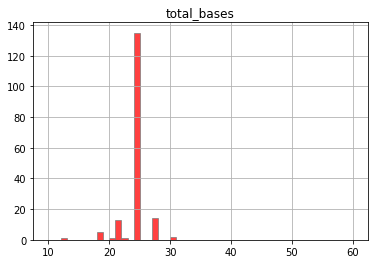

In [22]:
range=(10,60)
bins=50
df_stations.hist(column='total_bases', bins=bins, range=range, histtype='bar', facecolor='red', edgecolor='gray', rwidth=2, alpha=0.75)

# Export

In [23]:
df_stations.to_csv('df_stations.csv', encoding='latin-1', sep=';', index=False)

In [24]:
df_stations.head()


,address,id,latitude,longitude,name,number,total_bases,neighbours
0,Puerta del Sol nº 1,1,40.4168961,-3.7024255,Puerta del Sol A,1a,24,Centro
1,Puerta del Sol nº 1,2,40.4170009,-3.7024207,Puerta del Sol B,1b,24,Centro
2,Calle Miguel Moya nº 1,3,40.4205886,-3.7058415,Miguel Moya,2,24,Centro
3,Plaza del Conde Suchil nº 2-4,4,40.4302937,-3.7069171,Plaza Conde Suchil,3,18,Chamberí
4,Calle Manuela Malasaña nº 5,5,40.4285524,-3.7025875,Malasaña,4,24,Centro
